In [76]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database (or create it if it doesn't exist)
conn = sqlite3.connect("dataset_school.db")

# Load the JSON file into a DataFrame
students_values = pd.read_json("MOCK_DATA.json")

# Insert the DataFrame into the `students_values` table
students_values.to_sql("students_values", conn, if_exists="replace", index=False)

# Verify that the data was inserted
print("Data loaded into the 'students_values' table successfully!")
print(pd.read_sql("SELECT * FROM students_values LIMIT 5;", conn))

# Load the data from the 'students_values' table into a Pandas DataFrame
query = "SELECT * FROM students_values"
students_values = pd.read_sql(query, conn)

# Display the first few rows of the data
print(students_values.head())

# # Close the connection (you can re-open it later if needed)
# conn.close()

Data loaded into the 'students_values' table successfully!
   student_id first_name  last_name gender date_of_birth  enrollment_year  \
0         709     Kameko     Pencot      M      9/2/1990             2021   
1         443       Dita  Blowfield      M    12/25/1998             2023   
2         374    Melessa        Pie      M      7/1/1998             2021   
3         632    Rachele   Dovinson      M      8/9/1990             2020   
4         585   Sidonnie   Crighton      M     5/25/1996             2018   

   grade_level  course_id              course_name          department  \
0           12         95           Tax Accountant             Science   
1           12         87  Human Resources Manager                Math   
2           12         52                    Nurse  Physical Education   
3           11         73          Legal Assistant             English   
4            9         93         Technical Writer             Science   

   credits  instructor_id  
0    

In [77]:
# Check for null values
print(students_values.isnull().sum())

# Summary statistics
print(students_values.describe())

# Check the data types
print(students_values.dtypes)

# Count the number of students_values per grade level
print(students_values['grade_level'].value_counts())


student_id         0
first_name         0
last_name          0
gender             0
date_of_birth      0
enrollment_year    0
grade_level        0
course_id          0
course_name        0
department         0
credits            0
instructor_id      0
dtype: int64
       student_id  enrollment_year  grade_level   course_id     credits  \
count   500.00000        500.00000   500.000000  500.000000  500.000000   
mean    499.74400       2018.82200    10.562000   51.952000    3.956000   
std     286.94162          2.64278     1.099351   28.315459    0.821836   
min       2.00000       2015.00000     9.000000    1.000000    3.000000   
25%     247.75000       2016.00000    10.000000   29.500000    3.000000   
50%     517.50000       2019.00000    11.000000   53.000000    4.000000   
75%     732.25000       2021.00000    12.000000   77.000000    5.000000   
max     999.00000       2023.00000    12.000000  100.000000    5.000000   

       instructor_id  
count     500.000000  
mean       26

In [78]:
#Unique Courses
print("Number of unique courses", students_values['course_id'].nunique())

#Distribution of Gender
print("Distribution of gender: ", students_values['gender'].value_counts())

#Average number of credits per course
print("Average number of credits per course", students_values['credits'].mean())

Number of unique courses 99
Distribution of gender:  gender
M    273
F    227
Name: count, dtype: int64
Average number of credits per course 3.956


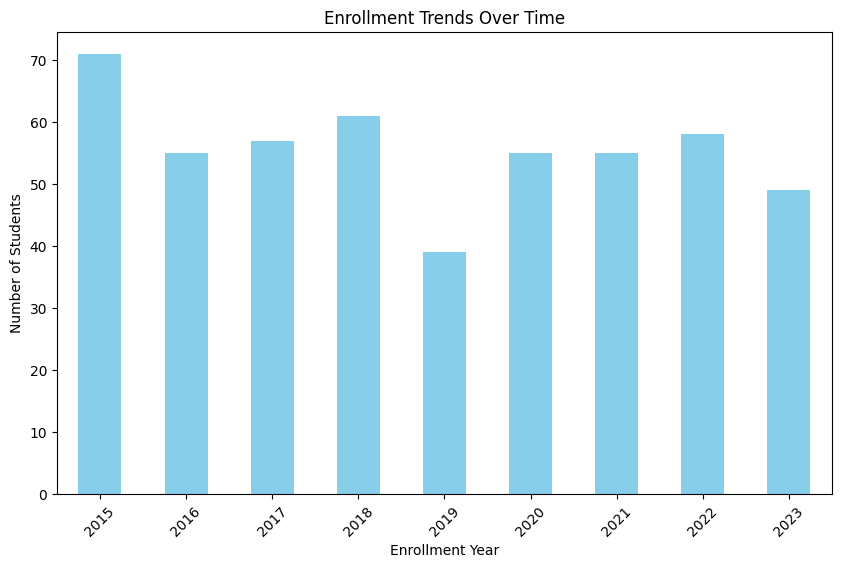

In [79]:
#Enrollment trends over time
# Group by enrollment year and count the number of students
enrollment_trends = students_values.groupby('enrollment_year')['student_id'].count()

# Plot the trends
plt.figure(figsize=(10, 6))
enrollment_trends.plot(kind='bar', color='skyblue')
plt.title("Enrollment Trends Over Time")
plt.xlabel("Enrollment Year")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.show()


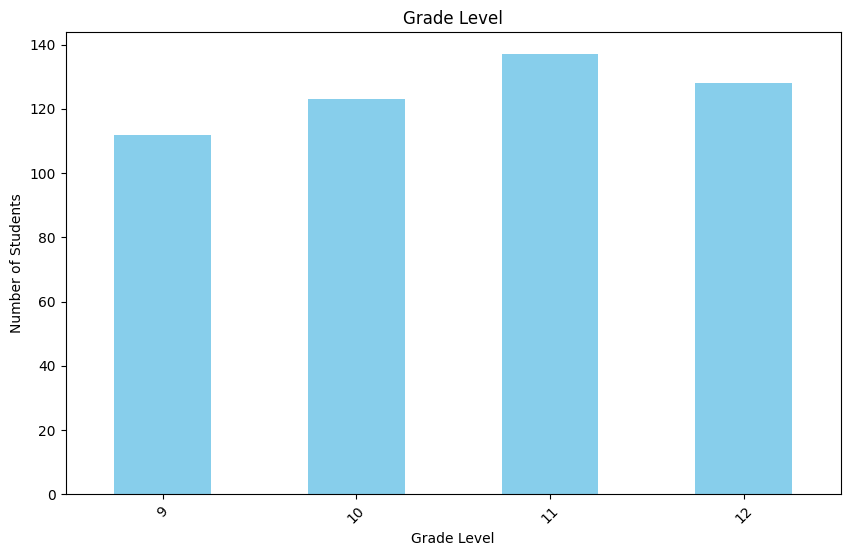

In [80]:
#Grade level distribution
grade_level = students_values.groupby('grade_level')['student_id'].count()
# Plot the trends
plt.figure(figsize=(10, 6))
grade_level.plot(kind='bar', color='skyblue')
plt.title("Grade Level")
plt.xlabel("Grade Level")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.show()

/var/folders/bv/65y6xtfn0ln4fdmnz0qnn4fw0000gn/T/ipykernel_72714/1684882295.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=students_data, x='grade_level', palette='viridis')


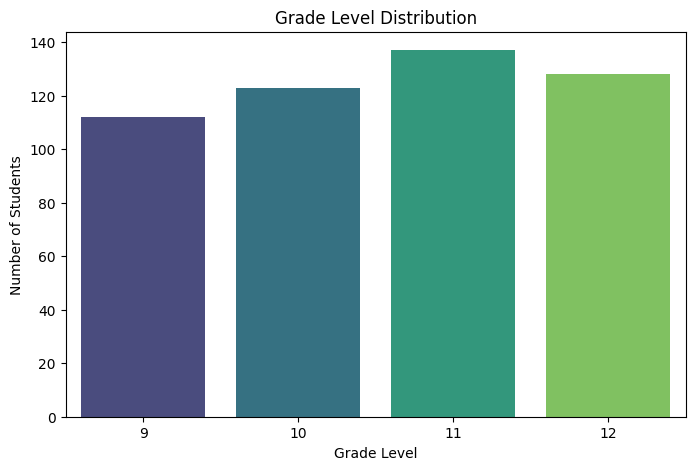

In [81]:
# Plot the grade level distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=students_data, x='grade_level', palette='viridis')
plt.title("Grade Level Distribution")
plt.xlabel("Grade Level")
plt.ylabel("Number of Students")
plt.show()


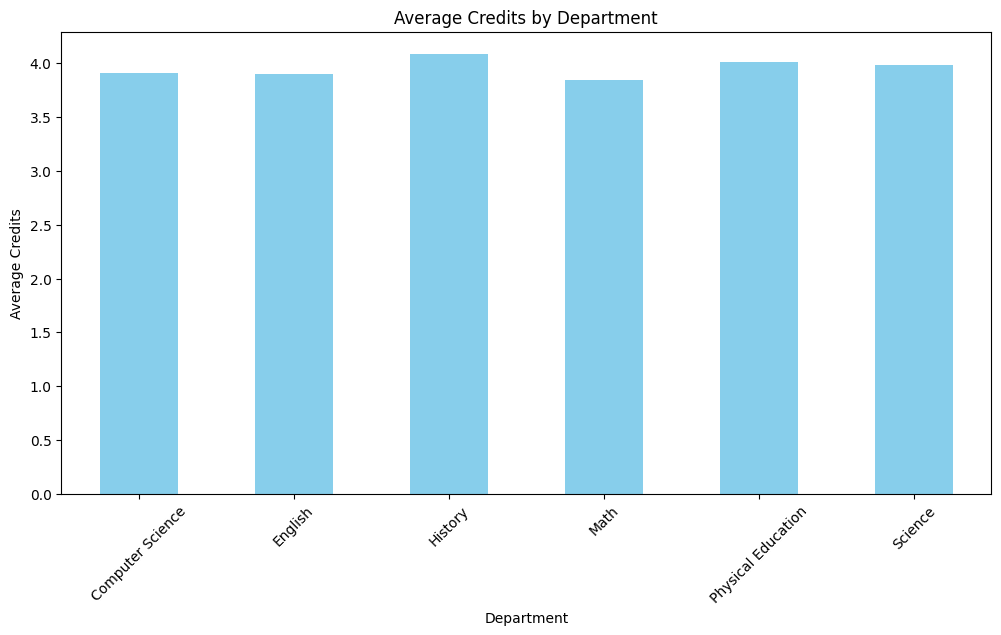

In [ ]:
#Average credits by the department level
plt.figure(figsize=(12, 6))
department_level_credits = students_values.groupby('department')['credits'].mean()

department_level_credits.plot(kind = 'bar', color='skyblue')
plt.title("Average Credits by Department")
plt.xlabel("Department")
plt.ylabel("Average Credits")
plt.xticks(rotation=45)
plt.show()


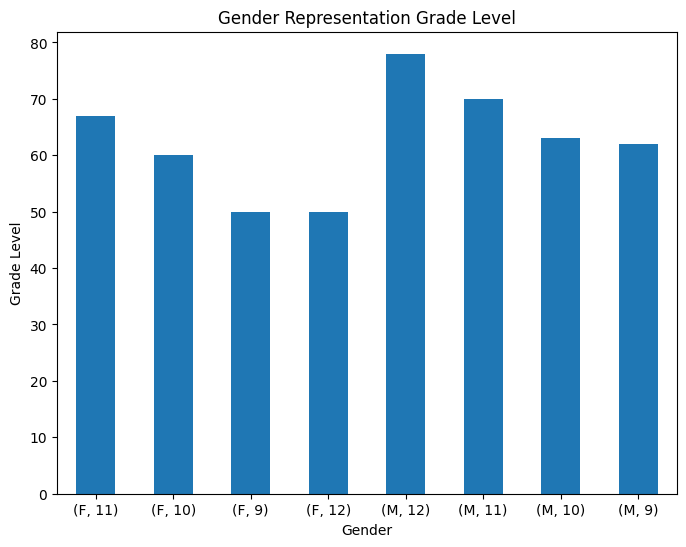

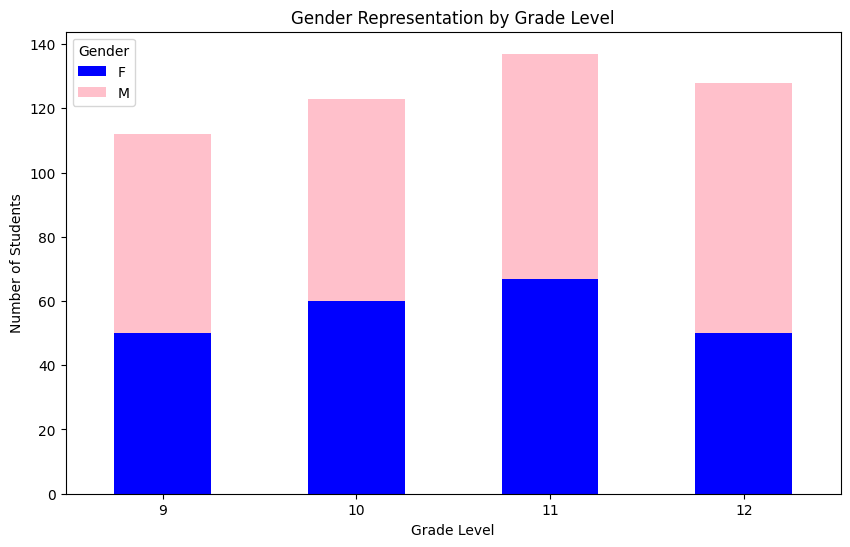

In [137]:
#Gender representation grade
plt.figure(figsize=(8, 6))
gender_representation = students_values.groupby('gender')['grade_level'].value_counts()
gender_representation.sort_values()
gender_representation.plot(kind='bar')
plt.title("Gender Representation Grade Level")
plt.xlabel("Gender")
plt.ylabel("Grade Level")
plt.xticks(rotation=360)
plt.show()

#Solution
# Create a pivot table
gender_grade = students_values.pivot_table(index='grade_level', columns='gender', values='student_id', aggfunc='count')
# Plot the data
gender_grade.plot(kind='bar', figsize=(10, 6), stacked=True, color=['blue', 'pink'])
plt.title("Gender Representation by Grade Level")
plt.xlabel("Grade Level")
plt.ylabel("Number of Students")
plt.legend(title="Gender")
plt.xticks(rotation=360)
plt.show()

In [138]:
# Close the connection
conn.close()